In [1]:
import pickle
import datetime

In [2]:
## 네이버 기사
naver_article_2015_2018 = pd.read_csv("data/raw/네이버기사/naver_article_2015_2018.csv")
naver_article_2008_2014 = pd.read_csv("data/raw/네이버기사/naver_article_2008_2014.csv")
naver_article = pd.concat([naver_article_2008_2014, naver_article_2015_2018], ignore_index=True)

## 자살자 수
suicide_count = []
year_ls = list(range(2008, 2018))
year_ls.remove(2015)
for year in year_ls:
    temp = pd.read_csv("data/raw/자살자수/{}.csv".format(year), header=None, names=["사망자 주소(시도)", "성별", "사망연월일", "사망시간", "사망연령(각세)", "사망원인 56항목 분류"])
    temp.drop(columns = "사망자 주소(시도)", inplace = True)
    suicide_count.append(temp)
## 2015년은 통계청이 사망자 주소 시도를 제공하지 않음.
temp = pd.read_csv("data/raw/자살자수/2015.csv".format(year), header=None, names=["성별", "사망연월일", "사망시간", "사망연령(각세)", "사망원인 56항목 분류"])
suicide_count.append(temp)
## 다 합치기
suicide_count = pd.concat(suicide_count, ignore_index=True)

## 인구
population = pd.read_csv("data/raw/총인구수/성_및_연령별_추계인구_전국.csv", encoding="euc-kr")

### Naver Article

In [3]:
naver_article.tail()

,category,content,date,link,photo_url,press,title
291185,생활,[오마이뉴스 오창균 기자] 어릴 때의 기억이다. 트랜지스터 라디오에서 흘러나오던 목...,2015-01-10 14:24:00,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,오마이뉴스,어릴 적 추억 담긴 '씨아기'와 '문래'... 뭔지 아시나요
291186,TV연예,‘하트투하트’ 최강희가 천정명과 강렬한 첫 만남을 가졌다. 9일 첫 방송한 tvN...,2015-01-09 23:56:00,https://entertain.naver.com/read?oid=014&aid=0...,NaN,파이낸셜뉴스,"‘하트투하트’ 최강희, 사람 찌르는 천정명 목격? ‘스릴넘치는 첫만남’"
291187,사회,"내 인생의 첫 나무는 낙엽송이었다. 나무심기가 한창이던 1960년대, 초록색 싹눈이...",2015-01-10 14:10:00,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,조선비즈,[인터뷰] 30년 나무와 숲이 가르쳐 준 지혜
291188,TV연예,‘하트투하트’ 천정명이 첫 회부터 강렬한 시작을 알렸다. 지난 9일 첫 방송된 t...,2015-01-10 10:48:00,https://entertain.naver.com/read?oid=014&aid=0...,NaN,파이낸셜뉴스,"‘하트투하트’ 천정명, 뻔뻔하고 능청스러운 정신과 의사로 ‘완벽빙의’"
291189,TV연예,[이데일리 스타in 강민정 기자] 케이블챈ㄹ tvN 금토드라마 ‘하트투하트’가 시청...,2015-01-10 08:57:00,https://entertain.naver.com/read?oid=018&aid=0...,NaN,이데일리,"최강희표 로코 '하트투하트', 기분 좋은 출발..1040女 꽉 잡았다"


In [4]:
naver_article["category"] = naver_article["category"].astype(str)
naver_article["content"] = naver_article["content"].astype(str)
naver_article["link"] = naver_article["link"].astype(str)
naver_article["press"] = naver_article["press"].astype(str)
naver_article["title"] = naver_article["title"].astype(str)

naver_article["date"] = naver_article["date"].astype("datetime64")
naver_article["merge_date"] = naver_article["date"].apply(lambda x : x.date())

In [5]:
## 중복 기사 제거
print("중복 기사 제거 이전: {}개".format(len(naver_article)))
naver_article = naver_article.drop_duplicates(['content'], keep='first')
print("중복 기사 제거 이후: {}개".format(len(naver_article)))

중복 기사 제거 이전: 291190개
중복 기사 제거 이후: 263345개


In [6]:
## 날짜순으로 기사 정렬
naver_article.sort_values(by="date", inplace=True)
naver_article.reset_index(drop=True, inplace=True)

In [7]:
naver_article.tail(2)

,category,content,date,link,photo_url,press,title,merge_date
263343,사회,서울의 한 대형병원에서 정신과 진료를 받던 환자가 의사를 찔러 살해했다. 서울 종로...,2018-12-31 22:09:00,https://news.naver.com/main/read.nhn?mode=LSD&...,https://imgnews.pstatic.net/image/023/2018/12/...,조선일보,"강북삼성병원서 정신과 의사, 환자가 휘두른 흉기에 살해",2018-12-31
263344,생활,서울의 한 대형병원에서 의사를 흉기로 찔러 숨지게 한 30대 남성이 경찰에 붙잡혔다...,2018-12-31 22:39:00,https://news.naver.com/main/read.nhn?mode=LSD&...,https://imgnews.pstatic.net/image/025/2018/12/...,중앙일보,환자에 숨진 강북삼성병원 의사…흉기 위협에 피하다 변,2018-12-31


### 자살자 수

In [73]:
suicide_count.head()

,성별,사망연월일,사망시간,사망연령(각세),사망원인 56항목 분류
0,1,20080101,5,61,55
1,1,20080101,8,67,55
2,1,20080101,17,56,55
3,1,20080101,18,37,55
4,1,20080102,0,30,55


#### 자살자 수
- 10년간 데이터에서 141233명의 자살자 중 사망연령 미상의 자살자는 총 27명
- 연령별 분석에 큰 영향을 미치지 않을 것으로 보여 Drop

In [89]:
suicide_count = suicide_count[suicide_count["사망연령(각세)"] != 999]

#### 사망시간
- 시간 해상도를 day로 가져가므로, 사망시간 미상의 자살자는 00시로 수정
- 24시에 자살한 사람은 다음날 00시와 같은 의미이므로 다음날로 넘김

In [90]:
## 혹시 몰라서 만들어놓은 자살시각
suicide_count["사망연월일"] = suicide_count["사망연월일"].apply(lambda x : datetime.datetime.strptime(str(x), "%Y%m%d"))
suicide_count["사망시간"] = suicide_count["사망시간"].apply(
    lambda x : datetime.timedelta(hours=x) if x == 99 else datetime.timedelta(hours=x))
suicide_count["time"] = suicide_count["사망연월일"] + suicide_count["사망시간"]

In [91]:
## 사망연령대 분류
suicide_count["사망연령대"] = suicide_count["사망연령(각세)"].apply(lambda age : str(age // 10 * 10))

## 성별, 사망연령대 one_hot_encoding
suicide_count["성별"] = suicide_count["성별"].apply(lambda sex: "male_" if sex == 1 else "female_")
temp = suicide_count["성별"] + suicide_count["사망연령대"]
suicide_onehot = pd.get_dummies(data=temp)
suicide_onehot.head()

,female_0,female_10,female_100,female_20,female_30,female_40,female_50,female_60,female_70,female_80,...,male_10,male_100,male_20,male_30,male_40,male_50,male_60,male_70,male_80,male_90
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [101]:
temp = pd.concat([suicide_count["사망연월일"], suicide_onehot], axis = 1)
temp.rename(columns = {"사망연월일" : "date"}, inplace = True)

In [104]:
## 필요한 데이터 만들기
suicide_group = temp.groupby(["date"]).sum().reset_index()

In [109]:
suicide_group.tail()

,date,female_0,female_10,female_100,female_20,female_30,female_40,female_50,female_60,female_70,...,male_10,male_100,male_20,male_30,male_40,male_50,male_60,male_70,male_80,male_90
3648,2017-12-27,0,0,0,2,1,3,0,1,0,...,2,0,2,7,7,5,4,3,0,0
3649,2017-12-28,0,1,0,1,3,5,4,1,3,...,0,0,2,3,8,7,6,2,2,0
3650,2017-12-29,0,0,0,1,1,1,0,1,0,...,0,0,2,7,4,5,0,3,0,0
3651,2017-12-30,0,0,0,3,0,2,1,0,0,...,0,0,5,7,3,4,5,2,1,0
3652,2017-12-31,0,0,0,1,6,2,1,1,1,...,0,0,3,7,3,7,3,3,0,0


### 대한민국 총 인구
- 대한민국 총 인구수는 매년 11월 1일 기준.
- 데이터 보간(interpolation)으로 일자별 인구수 추정
- reference: https://datascienceschool.net/view-notebook/288492be71084c2991bf0a4087355e0f/

In [146]:
population["연령별"].values

array(['0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세', '20 - 24세', '25 - 29세',
       '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세', '50 - 54세',
       '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상',
       '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세', '20 - 24세', '25 - 29세',
       '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세', '50 - 54세',
       '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세',
       '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100세 이상'],
      dtype=object)

In [151]:
population = population[population["성별"] != "전체"]
population = population[population["연령별"] != "계"]
population = population[population["연령별"] != "80세이상"]
population.reset_index(drop = True, inplace = True)
population_use = population.iloc[:, 3:].T
population_use.columns = population["연령별"].values
population_use.reset_index(inplace=True)
population_use.rename(columns = {"index" : "date"}, inplace = True)
population_use

,date,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100세 이상
0,2008,1191039,1468935,1779836,1740377,1695754,2096715,2045263,2309682,2117845,...,1267806,1038323,1011081,821775,571925,334776,162581,52553,9633,1701
1,2009,1174722,1393600,1729504,1788329,1658347,2071602,1992214,2289453,2164790,...,1314068,1081239,1008828,854731,600927,360838,176849,55767,10622,1841
2,2010,1172828,1300568,1682748,1821378,1654707,1989754,2000527,2252710,2192383,...,1420113,1128921,1007312,875369,638739,387547,188964,60109,12251,1985
3,2011,1193656,1214418,1630159,1842937,1678222,1909497,2049481,2181088,2240870,...,1546118,1176122,982408,897257,679260,410686,198879,66212,14049,2041
4,2012,1200629,1180798,1550478,1821485,1734689,1808875,2094985,2101052,2279295,...,1633180,1213715,991450,940767,712482,438974,210619,72887,15652,2182
5,2013,1188302,1179593,1464013,1779769,1794501,1734720,2111042,2028863,2305325,...,1737360,1247802,1006436,979241,743323,465166,221824,84211,16689,2264
6,2014,1179604,1163582,1389826,1728466,1844096,1714497,2096735,1982864,2286346,...,1857434,1297261,1047495,980699,779558,491882,244965,88979,17537,2438
7,2015,1175609,1161732,1294946,1684718,1877884,1730403,2015092,2004556,2248961,...,1951809,1404900,1095999,983369,804154,526920,267549,92698,19133,2698
8,2016,1148547,1183575,1209141,1632747,1903218,1739228,1922760,2044466,2160777,...,2080676,1528218,1150604,948477,826652,567927,287025,99590,21534,3003
9,2017,1102364,1188607,1173575,1554471,1882066,1791765,1825165,2089929,2083256,...,2123676,1615386,1187813,956466,873516,601756,309209,107174,24744,3325


In [153]:
population_use["date"] = population_use["date"].apply(lambda date : date + "-11-01")
population_use["date"] = population_use["date"].astype("datetime64")

In [154]:
population_use

,date,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100세 이상
0,2008-11-01 12:00:00,1191039,1468935,1779836,1740377,1695754,2096715,2045263,2309682,2117845,...,1267806,1038323,1011081,821775,571925,334776,162581,52553,9633,1701
1,2009-11-01 12:00:00,1174722,1393600,1729504,1788329,1658347,2071602,1992214,2289453,2164790,...,1314068,1081239,1008828,854731,600927,360838,176849,55767,10622,1841
2,2010-11-01 12:00:00,1172828,1300568,1682748,1821378,1654707,1989754,2000527,2252710,2192383,...,1420113,1128921,1007312,875369,638739,387547,188964,60109,12251,1985
3,2011-11-01 12:00:00,1193656,1214418,1630159,1842937,1678222,1909497,2049481,2181088,2240870,...,1546118,1176122,982408,897257,679260,410686,198879,66212,14049,2041
4,2012-11-01 12:00:00,1200629,1180798,1550478,1821485,1734689,1808875,2094985,2101052,2279295,...,1633180,1213715,991450,940767,712482,438974,210619,72887,15652,2182
5,2013-11-01 12:00:00,1188302,1179593,1464013,1779769,1794501,1734720,2111042,2028863,2305325,...,1737360,1247802,1006436,979241,743323,465166,221824,84211,16689,2264
6,2014-11-01 12:00:00,1179604,1163582,1389826,1728466,1844096,1714497,2096735,1982864,2286346,...,1857434,1297261,1047495,980699,779558,491882,244965,88979,17537,2438
7,2015-11-01 12:00:00,1175609,1161732,1294946,1684718,1877884,1730403,2015092,2004556,2248961,...,1951809,1404900,1095999,983369,804154,526920,267549,92698,19133,2698
8,2016-11-01 12:00:00,1148547,1183575,1209141,1632747,1903218,1739228,1922760,2044466,2160777,...,2080676,1528218,1150604,948477,826652,567927,287025,99590,21534,3003
9,2017-11-01 12:00:00,1102364,1188607,1173575,1554471,1882066,1791765,1825165,2089929,2083256,...,2123676,1615386,1187813,956466,873516,601756,309209,107174,24744,3325


In [164]:
population_use.columns[1]

'0 - 4세'

In [167]:
## 총 인구수 데이터 보간
import scipy.interpolate as spi
population_date = pd.DataFrame({"date" : pd.date_range(start='20080101', end='20171231')})
date = pd.date_range(start='20080101', end='20171231').map(datetime.datetime.toordinal)

for idx in range(1, len(population_use.columns)):
    ipo = spi.splrep(population_use["date"].apply(datetime.datetime.toordinal), population_use.iloc[:, idx], k=1)
    population_interpolation = list(map(int, spi.splev(date, ipo)))
    population_date[population_use.columns[idx]] = population_interpolation

population_date.shape

(3653, 22)

### 10만명 당 자살율 계산

In [22]:
suicide_rate = pd.DataFrame()
suicide_rate["merge_date"] = population_date["date"]
suicide_rate["suicide_rate"] = 100000*suicide_count["count"] / population_date["population"]
suicide_rate.head()

,merge_date,suicide_rate
0,2015-01-01,0.068758
1,2015-01-02,0.068757
2,2015-01-03,0.064828
3,2015-01-04,0.060898
4,2015-01-05,0.058933


In [23]:
## merge_date 
suicide_rate["merge_date"] = suicide_rate["merge_date"].apply(lambda x : x.date())

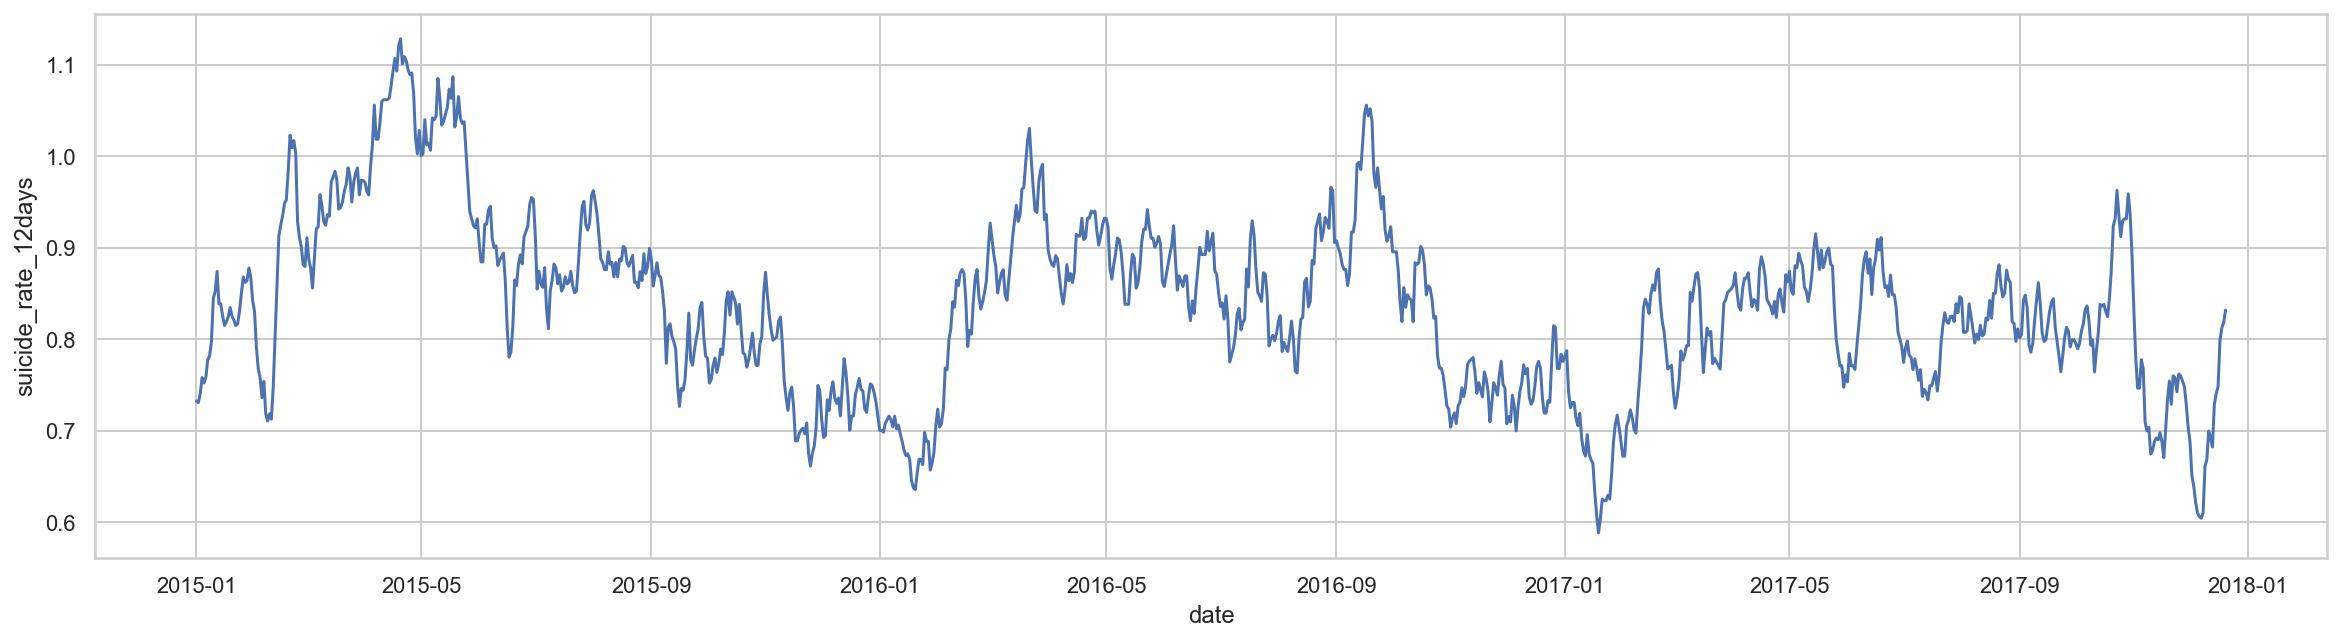

In [28]:
## 심심해서 그려본 3일동안 자살율
sc = suicide_rate.copy()
sc.index = sc.merge_date
sc["rate_days"] = None


moving_avg_idx = 12
for idx in range(len(sc)-moving_avg_idx+1):
    sc.iloc[idx, 2] = sc.iloc[idx:idx + moving_avg_idx, 1].sum()
    
plt.figure(figsize = (20, 5))
plt.plot(sc.index, sc["rate_days"])
plt.xlabel("date")
plt.ylabel("suicide_rate_{}days".format(moving_avg_idx))
plt.show()

### data merge

In [18]:
df = pd.merge(naver_article, suicide_rate, on="merge_date")
df.drop(columns = ["merge_date"], inplace = True)
len(df)

92549

In [19]:
df.head()

,category,content,date,link,photo_url,press,title,suicide_rate
0,세계,사우디아라비아 북서부 국경지대에서 자살폭탄 테러와 총격을 가한 일당 4명 중 3명이...,2015-01-10 16:40:00,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,SBS(text),사우디군 겨냥 자폭테러는 자국민 소행,0.060894
1,사회,(서산=뉴스1) 김종익 기자 = 충청남도 서산의료원에 근무하는 A씨(37)가 지난 ...,2015-01-10 23:04:00,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,뉴스1,행방 감춘 서산의료원 30대 직원 숨진채 발견,0.060894
2,세계,(두바이=연합뉴스) 강훈상 특파원 = 5일(현지시간) 사우디아라비아 북서부 국경지대...,2015-01-10 14:50:00,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,연합뉴스,사우디군 겨냥 자폭테러는 자국민 소행,0.060894
3,정치,[앵커] 초유의 항명사태를 짚어보겠습니다. 청와대가 정윤회 문건 사건과 관련해서...,2015-01-10 16:50:00,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,YTN,靑 민정수석 초유의 '항명사태',0.060894
4,세계,(이스탄불=연합뉴스) 김준억 특파원 = 터키 이스탄불의 쇼핑몰 두 곳에서 10일(현...,2015-01-10 20:08:00,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,연합뉴스,터키 이스탄불 쇼핑몰 2곳 사제폭발물 발견,0.060894


In [8]:
with open("data/use/df_article.pkl", "wb") as f:
    pickle.dump(naver_article, f)
# with open("data/use/df_rate.pkl", "wb") as f:
#     pickle.dump(df_rate, f)

In [2]:
with open("data/use/df.pkl", "rb") as f:
    df = pickle.load(f)

In [11]:
df.loc[5, "title"]

'터키 이스탄불 쇼핑몰 2곳 사제폭발물 발견'